In [113]:
# https://www.kaggle.com/muhammedazamkhan/interactive-data-visualization-nyc-taxi-trip

from __future__ import division
# pandas - Loading the data, data pre-processing
import pandas as pd
import numpy as np
import scipy.stats as scipy
# Matplotlib and Seaborn : Data visualization
import matplotlib.pyplot as plt
import requests #download from football data
import io 
import seaborn as sns
%matplotlib inline



### Load the data

In [162]:
# Read data
df = pd.read_csv("./Data/E0_17_18.csv")

In [163]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

### Cleaning and subsetting required data
Remove betting data as we don't need it for prediction.

In [164]:
# iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
result_16 = df.iloc[:,:23]
# Axis 0 will act on all the ROWS in each COLUMN
# Axis 1 will act on all the COLUMNS in each ROW
result_16 = result_16.drop(['Div','Date'],axis=1)

# 7 is FTR - so selects as far over as FTR
table_features = df.iloc[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
# All beating columns
bet_16 = df.iloc[:,23:]

In [165]:
# Contains - 'HomeTeam', 'AwayTeam', 'FTR' 
table_features.columns

Index(['HomeTeam', 'AwayTeam', 'FTR'], dtype='object')

In [166]:
result_16.head()
feature_table = df.iloc[:,:23]

In [167]:
# Contains columns from HomeTeam to AR (Away Team Red Cards)
result_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
375,Newcastle,Chelsea,3,0,H,1,0,H,M Atkinson,16,...,6,2,11,10,4,2,0,1,0,0
376,Southampton,Man City,0,1,A,0,0,D,A Marriner,8,...,3,2,8,10,1,12,3,1,0,0
377,Swansea,Stoke,1,2,A,1,2,A,A Taylor,26,...,11,5,12,9,6,0,1,2,0,0
378,Tottenham,Leicester,5,4,H,1,2,A,C Pawson,14,...,6,9,9,13,4,4,1,2,0,0
379,West Ham,Everton,3,1,H,1,0,H,G Scott,15,...,4,7,10,13,6,6,0,1,0,0


In [168]:
# 0) Team, 1) Home Goals Score, 2) Away Goals Score, 3) Home Attack Strength 
# 4) Away Attack Strength 5) Home Goals Conceded, 6) Away Goals Conceded, 
# 7) Home Defensive Strenght, 8) Away Defensive Strength
# New table of columns created
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
print(table_16)

Empty DataFrame
Columns: [Team, HGS, AGS, HAS, AAS, HGC, AGC, HDS, ADS]
Index: []


In [169]:
# Number of rows in csv file
result_16.shape[0]

380

In [170]:
# Full Time Home Goals total divided by / number of rows
avg_home_scored_16 = result_16.FTHG.sum()*1.0 / result_16.shape[0]
# Full Time Away Goals total divided by / number of rows
avg_away_scored_16 = result_16.FTAG.sum()*1.0 / result_16.shape[0]
#
avg_home_conceded_16 = avg_away_scored_16
#
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.5315789473684212
Average number of goals away 1.1473684210526316
Average number of goals conceded at home 1.1473684210526316
Average number of goals conceded away 1.5315789473684212


In [171]:
# Grouping HomeTeam and AwayTeam
# Result home - is grouped by 'HomeTeam' and declared an index of the new table: Result Home table.
# Result Away - is grouped by 'AwayTeam' and declared an index of the new table: Result Away table.

result_home = result_16.groupby('HomeTeam', as_index=True)
result_away = result_16.groupby('AwayTeam', as_index=True)

In [172]:
#list(result_home)[0]
result_16.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR'],
      dtype='object')

In [173]:
result_home = result_16.groupby('HomeTeam', as_index=True).agg(np.sum)
result_home

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
HomeTeam,,,,,,,,,,,,,,,,
Arsenal,54,20,23,10,341,184,146,69,186,195,130,93,25,23,1,2
Bournemouth,26,30,8,11,267,256,82,85,165,207,115,84,31,35,1,1
Brighton,24,25,8,11,217,243,71,87,198,152,90,98,37,16,1,1
Burnley,16,17,7,5,207,263,66,80,167,227,94,110,27,16,0,4
Chelsea,30,16,15,6,356,168,132,51,183,222,148,70,19,33,3,1
Crystal Palace,29,27,14,16,267,206,91,81,215,215,104,96,38,36,0,2
Everton,28,22,7,9,189,241,60,81,234,196,81,99,28,23,1,2
Huddersfield,16,25,10,12,207,186,55,77,180,180,102,83,26,32,2,1
Leicester,25,22,11,11,227,216,75,69,180,195,112,89,22,28,2,1


In [174]:
result_away = result_16.groupby('AwayTeam', as_index=True).agg(np.sum)
result_away

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
AwayTeam,,,,,,,,,,,,,,,,
Arsenal,31,20,11,7,238,250,79,87,194,197,86,93,25,32,2,1
Bournemouth,31,19,14,9,292,199,91,75,232,172,126,102,37,24,0,0
Brighton,29,10,13,8,312,166,94,47,141,215,130,73,13,17,1,1
Burnley,22,20,7,9,299,172,84,61,214,183,130,73,27,38,2,0
Chelsea,22,32,7,15,209,250,69,88,195,180,89,82,40,22,0,1
Crystal Palace,28,16,13,4,256,208,95,60,199,210,113,105,34,33,1,0
Everton,36,16,16,8,301,171,102,62,187,225,113,69,23,23,3,2
Huddersfield,33,12,7,5,255,153,88,56,197,216,126,63,23,35,3,1
Leicester,38,31,15,15,274,195,99,73,172,185,127,91,24,30,0,3


In [175]:
# Won't use mean***************
# result_home = result_16.groupby('HomeTeam', as_index=True).agg(np.mean)
# result_home

In [176]:
# Won't use mean***************
# result_away = result_16.groupby('AwayTeam', as_index=True).agg(np.mean)
# result_away

In [177]:
# Home Team  
table_16.Team = result_home.index.values
# Home Goals Score
table_16.HGS = result_home.FTHG.values
# Home Goals Conceded 
table_16.HGC = result_home.FTAG.values
# Attack Goals Strength
table_16.AGS = result_away.FTAG.values
# Away Goals Conceded
table_16.AGC = result_away.FTHG.values
# Home Attack Strength
# table_16.HAS = result_away.FTHG.values
# Display
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,54,20,NaN,NaN,20,31,NaN,NaN
1,Bournemouth,26,19,NaN,NaN,30,31,NaN,NaN
2,Brighton,24,10,NaN,NaN,25,29,NaN,NaN
3,Burnley,16,20,NaN,NaN,17,22,NaN,NaN
4,Chelsea,30,32,NaN,NaN,16,22,NaN,NaN
5,Crystal Palace,29,16,NaN,NaN,27,28,NaN,NaN
6,Everton,28,16,NaN,NaN,22,36,NaN,NaN
7,Huddersfield,16,12,NaN,NaN,25,33,NaN,NaN
8,Leicester,25,31,NaN,NaN,22,38,NaN,NaN
9,Liverpool,45,39,NaN,NaN,10,28,NaN,NaN


In [178]:
#Assuming number of home games = number of away games
num_games = result_16.shape[0]/20

In [179]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,54,20,1.855670,0.917431,20,31,0.917431,1.065292
1,Bournemouth,26,19,0.893471,0.871560,30,31,1.376147,1.065292
2,Brighton,24,10,0.824742,0.458716,25,29,1.146789,0.996564
3,Burnley,16,20,0.549828,0.917431,17,22,0.779817,0.756014
4,Chelsea,30,32,1.030928,1.467890,16,22,0.733945,0.756014
5,Crystal Palace,29,16,0.996564,0.733945,27,28,1.238532,0.962199
6,Everton,28,16,0.962199,0.733945,22,36,1.009174,1.237113
7,Huddersfield,16,12,0.549828,0.550459,25,33,1.146789,1.134021
8,Leicester,25,31,0.859107,1.422018,22,38,1.009174,1.305842
9,Liverpool,45,39,1.546392,1.788991,10,28,0.458716,0.962199


In [180]:
table_16[table_16.Team == "Everton"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
6,Everton,28,16,0.962199,0.733945,22,36,1.009174,1.237113


In [181]:
table_16.head()

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,54,20,1.855670,0.917431,20,31,0.917431,1.065292
1,Bournemouth,26,19,0.893471,0.871560,30,31,1.376147,1.065292
2,Brighton,24,10,0.824742,0.458716,25,29,1.146789,0.996564
3,Burnley,16,20,0.549828,0.917431,17,22,0.779817,0.756014
4,Chelsea,30,32,1.030928,1.467890,16,22,0.733945,0.756014


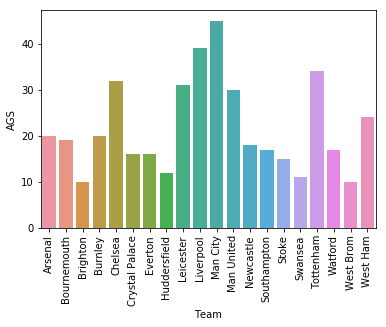

In [182]:
has_plot = sns.barplot(table_16.Team,table_16.AGS) # table_16.Team
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [183]:
# Building a feature dataframe
# So getting data and appending to the end of the dataframe/ feature table

''' feature_table contains all the fixtures in the season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [184]:
feature_table.head(26)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Arsenal,Leicester,H,10,3,1.855670,0.917431,1.422018,1.305842
1,Brighton,Man City,A,2,4,0.824742,1.146789,2.064220,0.446735
2,Chelsea,Burnley,A,6,5,1.030928,0.733945,0.917431,0.756014
3,Crystal Palace,Huddersfield,A,4,6,0.996564,1.238532,0.550459,1.134021
4,Everton,Stoke,H,4,1,0.962199,1.009174,0.688073,1.305842
5,Southampton,Swansea,D,2,0,0.687285,1.192661,0.504587,1.099656
6,Watford,Liverpool,D,4,5,0.927835,1.422018,1.788991,0.962199
7,West Brom,Bournemouth,H,6,2,0.721649,1.330275,0.871560,1.065292
8,Man United,West Ham,H,6,1,1.305842,0.412844,1.100917,1.443299
9,Newcastle,Tottenham,A,3,6,0.721649,0.779817,1.559633,0.687285


In [185]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [186]:
# Converting from H, D, A into numeric value
# lamba more powerful way - for each row in table
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

### Building to this point 

### Training from here down

In [187]:
## Training from here down
# Result column at the end shows the FTR result as 1,-1 or 0   
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
370,Burnley,Bournemouth,A,4,5,0.549828,0.779817,0.871560,1.065292,-1
371,Crystal Palace,West Brom,H,5,1,0.996564,1.238532,0.458716,0.927835,1
372,Huddersfield,Arsenal,A,3,4,0.549828,1.146789,0.917431,1.065292,-1
373,Liverpool,Brighton,H,11,1,1.546392,0.458716,0.458716,0.996564,1
374,Man United,Watford,H,1,3,1.305842,0.412844,0.779817,1.134021,1
375,Newcastle,Chelsea,H,6,2,0.721649,0.779817,1.467890,0.756014,1
376,Southampton,Man City,A,3,2,0.687285,1.192661,2.064220,0.446735,-1
377,Swansea,Stoke,A,11,5,0.584192,1.100917,0.688073,1.305842,-1
378,Tottenham,Leicester,H,6,9,1.374570,0.733945,1.422018,1.305842,1
379,West Ham,Everton,H,4,7,0.824742,1.192661,0.733945,1.237113,1


In [188]:
# Season 2018-2019
# X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]][:230]# 
# y_train = feature_table['Result'][:230]

# X_test = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]][230: 259]# 
# y_test = feature_table['Result'][230:259]

# X_predict = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]][259:]# 
# y_predict = feature_table['Result'][259:]

In [189]:
# Season 2016-2017 / Season 2017-2018
# split data into X and y
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]][:370]#
y_train = feature_table['Result'][:370]
# X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]][:300]#
# y_train = feature_table['Result'][:300]

X_test = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]][270: 370]# 
y_test = feature_table['Result'][270:370]
# X_test = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]][300: 370]# 
# y_test = feature_table['Result'][300:370]

X_predict = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]][370:]# 
y_predict = feature_table['Result'][370:]

In [190]:
len(feature_table)

380

In [191]:
len(X_test)

100

In [192]:
# sklearn.metrics - F1 score, is a measure of a test's accuracy

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB


In [193]:
clf1 = XGBClassifier() 

In [194]:
# cross validation - runs it multiple time and takes the average , cv= 10, validating, 69 is the last run
# 60 is the aveverage over all the result, average of all the runs

y_pred = clf1.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean()) 


[0.52631579 0.57894737 0.63157895 0.55263158 0.59459459 0.54054054
 0.51351351 0.55555556 0.55555556 0.48571429]
0.5534947729684572


In [195]:
### Training here
#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)

#KNN - k-nearest neighbors
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)

In [196]:
# Random Forest
plot_scores_rand = []
rand_f = RandomForestClassifier()
rand_f.fit(X_train, y_train)
scores = accuracy_score(y_test,rand_f.predict(X_test))
plot_scores_rand.append(scores)

C:\Users\Sean\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [197]:
# Gaussian Naive Bayes 
plot_scores_GaussianNB = []
rand_GaussianNB = GaussianNB()
rand_GaussianNB.fit(X_train, y_train)
scores = accuracy_score(y_test,rand_GaussianNB.predict(X_test))
plot_scores_GaussianNB.append(scores)

In [198]:
# LinearSVC
plot_scores_LinearSVC = []
rand_LinearSVC = LinearSVC(random_state=0)
rand_LinearSVC.fit(X_train, y_train)
scores = accuracy_score(y_test,rand_LinearSVC.predict(X_test))
plot_scores_LinearSVC.append(scores)

C:\Users\Sean\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [199]:
# VotingClassifier

# plot_scores_VotingClassifier = []
# rand_VotingClassifier = VotingClassifier()
# rand_VotingClassifier.fit(X_train, y_train)
# scores = accuracy_score(y_test,rand_VotingClassifier.predict(X_test))
# plot_scores_VotingClassifier.append(scores)

In [200]:
# plot 

In [201]:
#Predictions

y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)
y_pred_randomForest = rand_f.predict(X_predict)
y_pred_GaussianNB = rand_GaussianNB.predict(X_predict)
y_pred_LinearSVC = rand_LinearSVC.predict(X_predict)

In [202]:
this_week = result_16[['HomeTeam','AwayTeam']].loc[370:] # 259
this_week['Actual_Result']=y_predict
this_week['Result_GaussianNB']=y_pred_GaussianNB
this_week['Result_LinearSVC']=y_pred_LinearSVC
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_Random_Forest']=y_pred_randomForest
this_week['Result_logreg']=y_pred_logreg

In [203]:
# Made the following prediction
this_week

,HomeTeam,AwayTeam,Actual_Result,Result_GaussianNB,Result_LinearSVC,Result_knn,Result_XGB,Result_Random_Forest,Result_logreg
370,Burnley,Bournemouth,-1,0,1,-1,-1,-1,1
371,Crystal Palace,West Brom,1,1,1,1,1,1,1
372,Huddersfield,Arsenal,-1,0,-1,-1,1,1,-1
373,Liverpool,Brighton,1,1,1,1,1,1,1
374,Man United,Watford,1,1,1,-1,1,0,1
375,Newcastle,Chelsea,1,0,1,1,0,0,1
376,Southampton,Man City,-1,-1,-1,1,0,0,-1
377,Swansea,Stoke,-1,1,1,1,0,0,1
378,Tottenham,Leicester,1,0,1,-1,1,1,1
379,West Ham,Everton,1,-1,-1,-1,-1,-1,-1


In [204]:
# Converts numeric result back into a character
# For easier viewing 
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [205]:
this_week["Actual_Result"] = this_week.apply(lambda row: transformResultBack(row,"Actual_Result"),axis=1)
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)
this_week["Res_Random_Forest"] = this_week.apply(lambda row: transformResultBack(row,"Result_Random_Forest"),axis=1)
this_week["Res_GaussianNB"] = this_week.apply(lambda row: transformResultBack(row,"Result_GaussianNB"),axis=1)
this_week["Res_LinearSVC"] = this_week.apply(lambda row: transformResultBack(row,"Result_LinearSVC"),axis=1)

this_week.drop(["Result_knn","Result_GaussianNB","Result_LinearSVC", "Result_XGB","Result_logreg","Result_Random_Forest"],axis=1,inplace=True)

In [206]:
# Showing the last 10 results. 
# Showing the actual result and the classifier predictions. 
this_week

,HomeTeam,AwayTeam,Actual_Result,Res_knn,Res_XGB,Res_logreg,Res_Random_Forest,Res_GaussianNB,Res_LinearSVC
370,Burnley,Bournemouth,A,A,A,H,A,D,H
371,Crystal Palace,West Brom,H,H,H,H,H,H,H
372,Huddersfield,Arsenal,A,A,H,A,H,D,A
373,Liverpool,Brighton,H,H,H,H,H,H,H
374,Man United,Watford,H,A,H,H,D,H,H
375,Newcastle,Chelsea,H,H,D,H,D,D,H
376,Southampton,Man City,A,H,D,A,D,A,A
377,Swansea,Stoke,A,H,D,H,D,H,H
378,Tottenham,Leicester,H,A,H,H,H,D,H
379,West Ham,Everton,H,A,A,A,A,A,A


In [207]:
# Point One
# Picking randomly - Win, Draw, Lose - 33% accuracy
# So there is an improvement

# Point Two
# Premier league is hard to predict.
# The fact that Leicester won the Premier League in 2015-2016, 
# XGBoost gettting 6/10 games right is impressive for the size of the 
# dataset

# Point Three
# Previously dominant teams such as Manchester United and Chelsea
# losing their strength.

# Point Four
# https://www.football.london/reading-fc/how-david-prutton-rates-pundit-15149366
# Mark Lawrenson accuracy - 48%
# Champion pundit - David Prutton accuracy - 46%
# http://eightyfivepoints.blogspot.com/2017/07/how-are-lawrenson-and-merson-beating.html
# Paul Merson accuracy - 52% 

In [208]:
# Season 2018-2019 
# Correct results
# 259 - XGB, RandomForest
# 260 - XGB, 
# 261 - KNN, XGB, Logreg, Random Forest 
# 262 - KNN, XGB, Logreg, Random
# 263 - None
# 264 - None
# 265 - All were right
# 266 - All were right
# 267 - KNN, Logreg, Random Forest was right
# 268 - None 

# KNN - k-nearest neighbors - 5/10
# XGB - 6/10
# Logreg - Logistic Regression - 5/10
# Random Forest - 6/10

# GaussianNB - 5/10
# LinearSVC - 5/10

In [209]:
# Season 2017-2018
# Correct results
# 370 - KNN, XGB, random_forest
# 371 - KNN, XGB, Logreg, Random Forest  
# 372 - KNN, logreg
# 373 - KNN, XGB, Logreg, Random Forest  
# 374 - XGB, logreg
# 375 - KNN, logreg
# 376 - logreg, random_forest
# 377 - None
# 378 - XGB, logreg, random_forest
# 379 - None

# KNN - k-nearest neighbors - 5/10
# XGB - 5/10
# Logreg - Logistic Regression - 7/10
# Random Forest - 4/10
# GaussianNB - Gaussian Naive Bayes - 4/10
# LinearSVC - 7/10

In [96]:
# Season 2016-2017
# Correct results
# 370 - KNN, XGB, logreg, random_forest
# 371 - KNN, XGB, logreg, random_forest
# 372 - KNN, XGB, logreg, random_forest
# 373 - KNN, XGB, logreg
# 374 - None
# 375 - KNN, XGB, logreg
# 376 - None
# 377 - None
# 378 - None
# 379 - KNN, XGB, logreg, random_forest

# KNN - 6/10
# XGB - 6/10
# Logreg - Logistic Regression - 6/10
# Random Forest - 6/10 
# GaussianNB - Gaussian Naive Bayes - 7/10
# LinearSVC - 6/10

In [86]:
# Next - K-Nearest-Neighbor, Logistic Regression, Random Forest

In [87]:
# Talk about more rows of data to predict
# It shows good accuracy for the amount of data I have 